In [70]:
%matplotlib inline
from matplotlib import style
#style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [71]:
import numpy as np
import pandas as pd

In [72]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [79]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [74]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [75]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [76]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [77]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [56]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [81]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [83]:
columns = inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [89]:
data = engine.execute("select date from measurement")
data.all()

[('2010-01-01',),
 ('2010-01-02',),
 ('2010-01-03',),
 ('2010-01-04',),
 ('2010-01-06',),
 ('2010-01-07',),
 ('2010-01-08',),
 ('2010-01-09',),
 ('2010-01-10',),
 ('2010-01-11',),
 ('2010-01-12',),
 ('2010-01-14',),
 ('2010-01-15',),
 ('2010-01-16',),
 ('2010-01-17',),
 ('2010-01-18',),
 ('2010-01-19',),
 ('2010-01-20',),
 ('2010-01-21',),
 ('2010-01-22',),
 ('2010-01-23',),
 ('2010-01-24',),
 ('2010-01-25',),
 ('2010-01-26',),
 ('2010-01-27',),
 ('2010-01-28',),
 ('2010-01-30',),
 ('2010-01-31',),
 ('2010-02-01',),
 ('2010-02-03',),
 ('2010-02-04',),
 ('2010-02-05',),
 ('2010-02-06',),
 ('2010-02-07',),
 ('2010-02-08',),
 ('2010-02-09',),
 ('2010-02-11',),
 ('2010-02-12',),
 ('2010-02-13',),
 ('2010-02-14',),
 ('2010-02-15',),
 ('2010-02-16',),
 ('2010-02-17',),
 ('2010-02-19',),
 ('2010-02-20',),
 ('2010-02-21',),
 ('2010-02-22',),
 ('2010-02-23',),
 ('2010-02-24',),
 ('2010-02-25',),
 ('2010-02-26',),
 ('2010-02-28',),
 ('2010-03-01',),
 ('2010-03-02',),
 ('2010-03-03',),
 ('2010-03

# Exploratory Climate Analysis

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 


# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []

# Gives all data
# results = session.query(Measurement.date, Measurement.prcp)

# filters out data more than a year prior to the date specified above
# .all() puts the results into a list
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [58]:
# Save the query results as a Pandas DataFrame
df = pd.DataFrame(results, columns=['date','precipitation'])
print(df)

            date  precipitation
0     2016-08-23           0.00
1     2016-08-24           0.08
2     2016-08-25           0.08
3     2016-08-26           0.00
4     2016-08-27           0.00
...          ...            ...
2225  2017-08-19           0.09
2226  2017-08-20            NaN
2227  2017-08-21           0.56
2228  2017-08-22           0.50
2229  2017-08-23           0.45

[2230 rows x 2 columns]


In [59]:
# Set the index to the date column without creating another database (inplace=True)
df.set_index(df['date'], inplace=True)

print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09           0.03
2016-09-10           0.00
2016-09-11           0.05
2016-09-12           0.00
2016-09-13           0.02
2016-09-14           1.32
2016-09-15           0.42
2016-09-16           0.06
2016-09-17           0.05
2016-09-18           0.00
2016-09-19           0.00
2016-09-20           0.00
2016-09-21           0.00
2016-09-22           0.02
2016-09-23           0.00
2016-09-24           0.00
2016-09-25           0.00
2016-09-26           0.06
2016-09-27           0.02
2016-09-28           0.00
2016-09-29  

In [60]:
# Sort the dataframe by date
df = df.sort_index()

print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

<AxesSubplot:xlabel='date'>

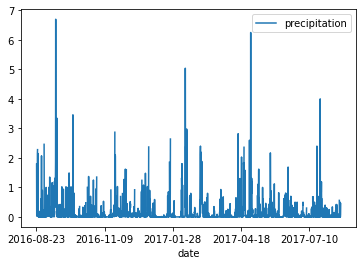

In [61]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [62]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# The count is the number of times precipitation was observed. 
# The other statistics are the precipitation amounts for each station for each day.

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [63]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [64]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

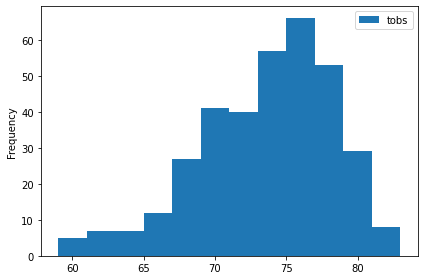

In [66]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(results, columns=['tobs'])

df.plot.hist(bins=12)
plt.tight_layout()

In [67]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates



# Challenge

In [69]:
measures = session.query("select * from measurement")

ArgumentError: Textual column expression 'select * from measurement' should be explicitly declared with text('select * from measurement'), or use literal_column('select * from measurement') for more specificity